##  Four State Model
-------------

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

Following is the two state simultaneous model. States E1 to R4 represents the exchenger with 
- (1) calcium bound on the internal membrane side (E1)
- (2) calcium bound on the extrnal membrane (E2)
- (3) no calcium bound in hte external side (E3)
- (4) no calcium bound in the internal side (E4)

For the consecutive model,
 - Only those fraction of the states E3 and E4 will undergo translocation which have bound three sodium ions
 - Only those fractions of the states E1 and E2 will bind calcium which have no bound sodium ions

<img src = "img/4.png" height=300px width=300px> <img>

#### Transition Matrix

|states|E1|E2|E3|E4
|--|--|--|--|--|
|E1|1-(k1+k8) |k1 |0 |k8|
|E2|k2 |1-(k2+k3) |k3|0|
|E3|0 |k4|1-(k4+k5) |k5|
|E4|k7 |0 |k6 |1-(k7+k6)|


#### Differential Equations

$\frac{dE_{1}}{dt} = k_{2}E_{2} + k_{7}E_{4} - (k_{1}+k_{8})E_{1}$

$\frac{dE_{2}}{dt} = k_{4}E_{3} + k_{1}E_{1} - (k_{2}+k_{3})E_{2}$

$\frac{dE_{3}}{dt} = k_{3}E_{2} + k_{6}E_{4} - (k_{4}+k_{5})E_{3}$

$\frac{dE_{4}}{dt} = k_{8}E_{1} + k_{5}E_{3} - (k_{7}+k_{6})E_{4}$

Using, $ E_4 = 1 - E_1 - E_2 - E_3 $

$\frac{dE_{1}}{dt} = - (k_{1}+k_{8} + k_{7})E_{1} + (k_{2}-k_{7})E_{2}- k_{7}E_{3} + k_{7}$

$\frac{dE_{2}}{dt} =  k_{1}E_{1} - (k_{2}+k_{3})E_{2}+ k_{4}E_{3}$

$\frac{dE_{3}}{dt} =  - k_{6}E_{1} + (k_{3}- k_{6})E_{2} - (k_{4}+k_{5} + k_{6})E_{3} + k_{6}$

#### Matrix Equation

$$\begin{pmatrix}
-(k_{1} + k_{8} + k_{7}) & (k_{2}-k_{7}) & -k_{7}\\
k_{1} & - (k_{2}+k_{3}) & k_{4} \\
- k_{6} & (k_{3}- k_{6}) & - (k_{4}+k_{5} + k_{6})\\
\end{pmatrix} \begin{pmatrix}
E_{1}\\
E_{2}\\
E_{3}\\
\end{pmatrix} = \begin{pmatrix}
-k_{7}\\
0\\
-k_{6}\\
\end{pmatrix}$$

-----------

In [60]:
f3n = ni**2.5/(ni**2.5+17**2.5)
kcon1 = 0.1
kcoff1 = 0.05
kcon2 = 20
kcoff2 = 0.3
# kinact = 0
#kinact = 0.03
#kinact = 0.1
kinact = 0.3
#kinact = 1
k2 = ci*kcon1
k1 = kcoff1
k5 = ci*kcon2
k6 = kcoff2
k8 = 0.3
k7 = f3n*kinact
k3 = 0.1
k4 = f3n*kinact*25

In [61]:
k = {"k1":kcoff1,"k2":ci*kcon1,"k3":0.1,\
    "k4":f3n*kinact*25,"k5":ci*kcon2,\
    "k6":kcoff2, "k7":f3n*kinact,"k8":0.8}

In [62]:
k

{'k1': 0.05,
 'k2': 0.0,
 'k3': 0.1,
 'k4': 0.0,
 'k5': 0,
 'k6': 0.3,
 'k7': 0.0,
 'k8': 0.8}

In [71]:
# function that returns dy/dt
def model(y,t,k):
    '''y[0] = e1, y[1] = e2, y[2] = e3, y[3] = e4'''
    dy1dt = -(k["k1"]+k["k8"]+k["k7"])*y[0] +(k["k2"]-k["k7"])*y[1]-k["k7"]*y[2]+k["k7"]
    dy2dt = k["k1"]*y[0] - (k["k2"]+k["k3"])*y[1] + k["k4"]*y[2]
    dy3dt = -k["k6"]*y[0] + (k["k3"]-k["k6"])*y[1] - (k["k4"]+k["k5"]+k["k6"])*y[2] + k["k6"]
    dydt = [dy1dt,dy2dt,dy3dt]
    return dydt

In [74]:
N = 1
T = 50
#initial Conditions
y0 = [N,0,0]
# time points
t = np.linspace(0,T)
'''Solve ODEs'''
y = odeint(model,y0,t,args=(k,))
y1 = np.empty_like(t)
y2 = np.empty_like(t)
y3 = np.empty_like(t)
y4 = np.empty_like(t)
I =  np.empty_like(t)
for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = y[i][2]
    y4[i] = N - y1[i] - y2[i] -y3[i]
    I[i] = y2[i]*f3n

In [75]:
y1[T-1],y2[T-1],y3[T-1],y4[T-1],I[T-1]

(8.881873639014677e-11,
 0.000449194453267871,
 0.9995503604796852,
 4.4497822826450317e-07,
 0.0)

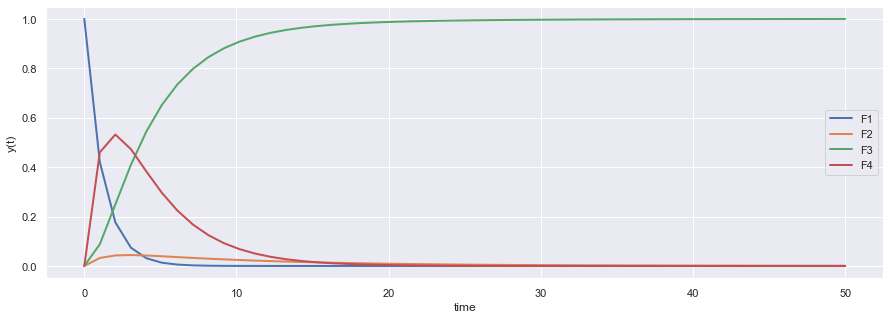

In [76]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,linewidth=2,label='F1')
plt.plot(t,y2,linewidth=2,label='F2')
plt.plot(t,y3,linewidth=2,label='F3')
plt.plot(t,y4,linewidth=2,label='F4')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

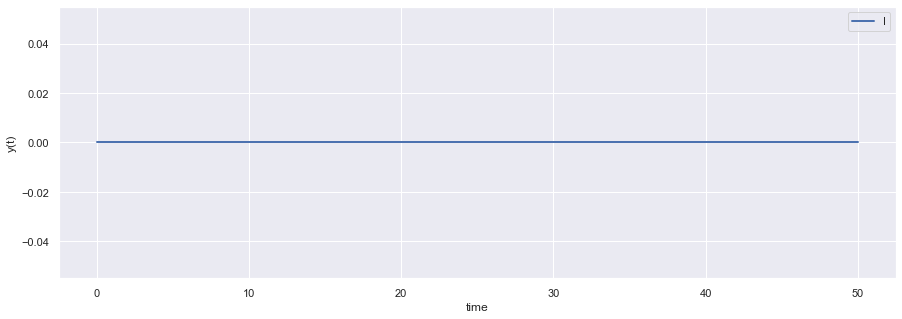

In [77]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,I,linewidth=2,label='I')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

In [78]:
tnow = []
ixnow = []
chi = 2
ci = chi
t = 0
dt = 0.003
for i in range(1,150001):
    t = t + dt
    ni = 0
    if t>30 and t<60:
        ni = 100
        ci = chi
    if t>60 and t<90:
        ni = 0
        ci = 0
    if t>90 and t<130:
        ni = 100
        ci = 0
    if t>130 and t<160:
        ni = 100
        ci = chi
    if t>160 and t<190:
        ni = 100
        ci = 0
    if t>190 and t<220:
        ni = 100
        ci = chi
    if t>220 and t<250:
        ni = 100
        ci = 0
    if t>250 and t<280:
        ni = 0
        ci = chi
    if t>280 and t<310:
        ni = 100
        ci = 0
    if t>310 and t<340:
        ni = 0
        ci = 0
    if t>340 and t<370:
        ni = 100
        ci = 0
    if t>370 and t<400:
        ni = 0
        ci = 0
    if t>400 and t<430:
        ni = 100
        ci = chi
    if t>430 and t<460:
        ni = 0
        ci = 0
    tnow.append(t)
    ixnow.append(incx)
    

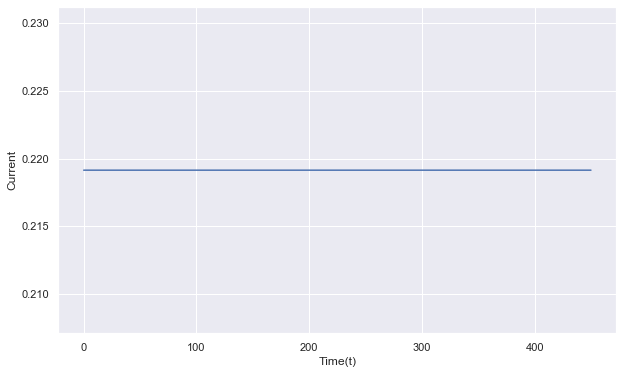

In [79]:
plt.figure(figsize = [10,6])
plt.plot(tnow,ixnow)
plt.xlabel("Time(t)")
plt.ylabel("Current")
plt.show()

### Second figure

In [13]:
ni = 40
cinow = []
ixnow = []
for i in range(1,1001):
    logci = -(8-i/300)
    ci = 10**(logci)*1000000
    f3n = ni**2.5/(ni**2.5+17**2.5)
    kcon1 = 0.1
    kcoff1 = 0.05
    kcon2 = 20
    kcoff2 = 0.3
   # kinact = 0
    #kinact = 0.03
    #kinact = 0.1
    #kinact = 0.3
    kinact = 1
    
    k2 = ci*kcon1
    k1 = kcoff1
    k5 = ci*kcon2
    k6 = kcoff2
    k8 = 0.3
    k7 = f3n*kinact
    k3 = 0.1
    k4 = f3n*kinact*25
    
    
    x1 = k2*k4*(k7+k6)+k5*k7*(k2+k3)
    x2 = k1*k7*(k4+k5)+k4*k6*(k1+k8)
    x3 = k1*k3*(k7+k6)+k8*k6*(k2+k3)
    x4 = k2*k8*(k4+k5)+k3*k5*(k1+k8)
    d = x1+x2+x3+x4
    
    e1 = x1/d
    e2 = x2/d
    e3 = x3/d
    e4 = x4/d
    incx = e4*f3n
    cinow.append(logci)
    ixnow.append(incx)
    


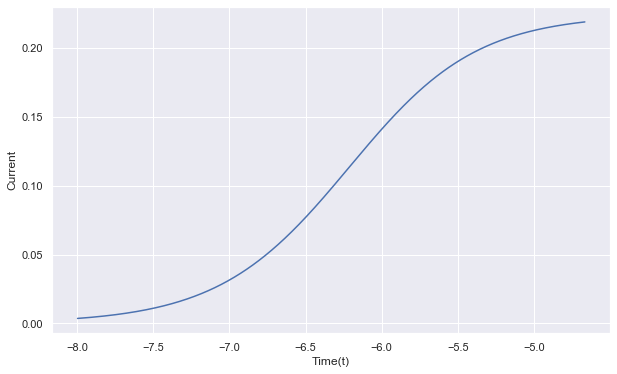

In [14]:
plt.figure(figsize = [10,6])
plt.plot(cinow,ixnow)
plt.xlabel("Time(t)")
plt.ylabel("Current")
plt.show()